In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# `scipy.optimize.curve_fit` 的用法详解

`scipy.optimize.curve_fit` 是 Python 中 SciPy 库的一个重要函数，主要用于拟合一组数据到指定的函数模型。它通过最小化预测值与实际观测值之间的差异（通常是平方和）来找到最佳拟合参数。

函数基本结构

`curve_fit` 的基本调用形式如下：

```python
scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, bounds=(-np.inf, np.inf), method=None)
```
参数说明:

- f: 模型函数，接受独立变量和待估计参数作为输入，返回依赖变量（预测值）。
- xdata: 独立变量数据。
- ydata: 依赖变量数据（观察到或实际测得的值）。
- p0: 初始猜测参数。如果未提供，则默认所有初始猜测为 1。
- sigma: 每个 ydata 点的噪声级别或不确定性（标准偏差），长度需与 ydata 相同，且内容必须大于零。
- absolute_sigma: 如果为 True，则 sigma 被认为是直接给定的；如果为 False（默认），则只对相对权重进行调整。
- bounds: 限制拟合参数的取值范围。通过设置参数的上下限，可以确保优化过程中的参数值不会超出预期范围，从而避免不合理的拟合结果。
- method: 用于指定优化算法的选择。通过选择不同的优化方法，可以影响拟合过程的效率和结果，特别是在处理复杂或大规模数据时。

    可用的优化方法
    - 'lm': Levenberg-Marquardt 算法（默认方法）。适用于无约束问题，通常在处理小型数据集时表现良好。
    - 'trf': Trust Region Reflective 方法。适用于有界约束的问题，尤其是在参数有明确上下限时更为有效。
    - 'dogbox': 另一种适用于有界约束的方法，通常在参数较多或问题较复杂时表现更好。


该函数返回两个对象：

- popt: 最优参数值的数组。
- pcov: 参数协方差矩阵，用于估计拟合参数的不确定性

## 示例1

In [17]:
# 定义模型函数
def func(x, a, b, c):
    return a * np.power(x, 2) + b * x + c

In [18]:
# 生成模拟数据
xdata = np.linspace(-10, 10, 100)
y = func(xdata, 3, -2, 1)
np.random.seed(0)  # 设置随机种子以确保结果可复现
y_noise = y + 0.5 * np.random.normal(size=xdata.size)

In [19]:
# 使用 curve_fit 进行拟合
popt, pcov = curve_fit(func, xdata, y_noise)
popt, pcov

(array([ 3.006475  , -2.00743317,  0.80971046]),
 array([[ 2.37756274e-06, -1.01181421e-12, -8.08531516e-05],
        [-1.01181421e-12,  6.46631192e-05,  6.12578547e-11],
        [-8.08531516e-05,  6.12578547e-11,  4.94853399e-03]]))

In [20]:
print("Optimal parameters are: a=%f, b=%f, c=%f" % (popt[0], popt[1], popt[2]))

Optimal parameters are: a=3.006475, b=-2.007433, c=0.809710


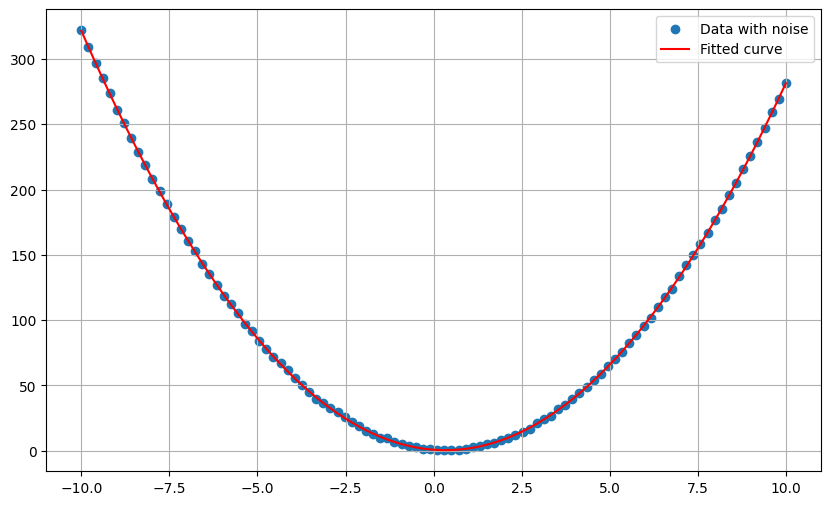

In [21]:
# 绘制结果
plt.figure(figsize=(10, 6))
plt.scatter(xdata, y_noise, label="Data with noise")
plt.plot(xdata, func(xdata, *popt), color="red", label="Fitted curve")
plt.legend()
plt.grid()
plt.show()

## 示例2

In [22]:
# 定义指数函数
def exp_func(x, a, b):
    return a * (1 - np.exp(-b * x))

In [23]:
# 模拟数据（多条曲线）
x_data = np.linspace(0, 1, 100)
curves = [
    exp_func(x_data, a, 2.5) + np.random.normal(0, 0.02, len(x_data))
    for a in np.linspace(1, 3, 5)
]

In [24]:
# 全局拟合
params = []
for curve in curves:
    popt, popt_covariance = curve_fit(
        exp_func, x_data, curve, bounds=([0, 0], [np.inf, np.inf])
    )
    print("popt:", popt)
    print("popt_covariance:", popt_covariance)
    params.append(popt)

popt: [0.98858452 2.57368566]
popt_covariance: [[ 7.00988181e-05 -4.01252895e-04]
 [-4.01252895e-04  2.63813976e-03]]
popt: [1.51157654 2.44822629]
popt_covariance: [[ 6.82034699e-05 -2.36720570e-04]
 [-2.36720570e-04  9.29199970e-04]]
popt: [2.0024766  2.47686054]
popt_covariance: [[ 6.44061687e-05 -1.71740796e-04]
 [-1.71740796e-04  5.19712161e-04]]
popt: [2.50205643 2.49465789]
popt_covariance: [[ 7.84782724e-05 -1.69307616e-04]
 [-1.69307616e-04  4.15422380e-04]]
popt: [2.99426951 2.49949602]
popt_covariance: [[ 7.50342844e-05 -1.35664903e-04]
 [-1.35664903e-04  2.79138256e-04]]


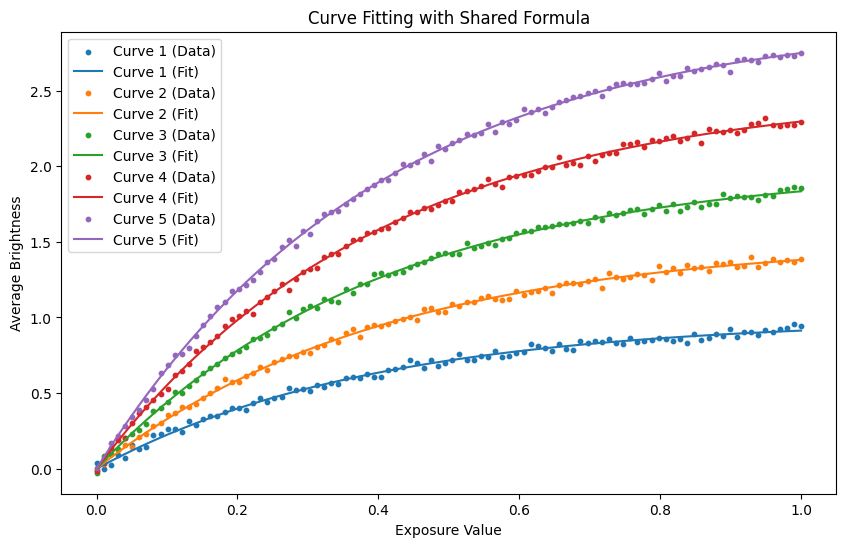

In [25]:
# 绘制原始数据和拟合结果
plt.figure(figsize=(10, 6))
for i, (curve, param) in enumerate(zip(curves, params)):
    plt.scatter(x_data, curve, label=f"Curve {i + 1} (Data)", s=10)
    plt.plot(x_data, exp_func(x_data, *param), label=f"Curve {i + 1} (Fit)")
plt.legend()
plt.xlabel("Exposure Value")
plt.ylabel("Average Brightness")
plt.title("Curve Fitting with Shared Formula")
plt.show()